<a href="https://colab.research.google.com/github/VladislavTumanov/bookish-computing-machine/blob/main/Train_without_a_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import io 
import seaborn as sns
import torch 
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import scipy
from sklearn.model_selection import  StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
RANDOM_STATE = 17

In [3]:
from google.colab import files
uploaded = files.upload()

Saving X_train.txt to X_train.txt


In [4]:
X_train = np.loadtxt(io.BytesIO(uploaded['X_train.txt']))

In [6]:
from google.colab import files
uploaded = files.upload()

Saving y_train.txt to y_train.txt


In [7]:
y_train = np.loadtxt(io.BytesIO(uploaded['y_train.txt']))

In [8]:
from google.colab import files
uploaded = files.upload()

Saving X_test.txt to X_test.txt


In [9]:
X_test = np.loadtxt(io.BytesIO(uploaded['X_test.txt']))

In [10]:
from google.colab import files
uploaded = files.upload()

Saving y_test.txt to y_test.txt


In [11]:
y_test = np.loadtxt(io.BytesIO(uploaded['y_test.txt']))

In [12]:
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [13]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

In [14]:
np.unique(y) #the number of labels of target values

array([1., 2., 3., 4., 5., 6.])

In [15]:
n_classes = np.unique(y).size

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # need scaled samples 

In [17]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled) #decrease the dimension to 90% (this is such a number of components to explain 90% of the variance)

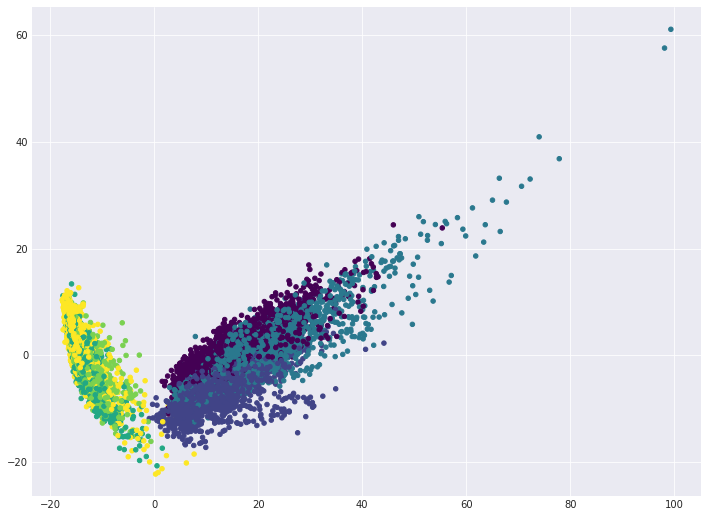

In [18]:
plt.scatter(X_pca[:,0], X_pca[: , 1] , c=y, s=20, cmap='viridis')

In [19]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init = 100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

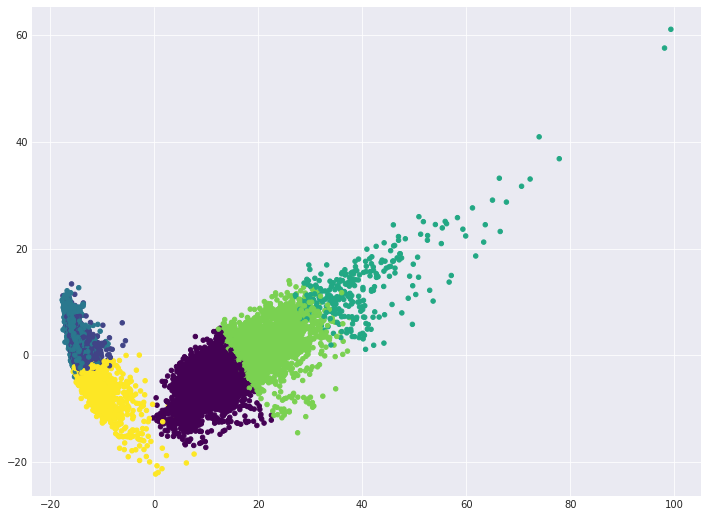

In [20]:
plt.scatter(X_pca[: ,0],X_pca[: , 1] , c=cluster_labels, s=20,  cmap='viridis')

In [21]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,903,0,0,78,741,0,1722
подъем вверх по лестнице,1241,0,0,5,296,2,1544
спуск по лестнице,320,0,0,196,890,0,1406
сидение,1,1235,91,0,0,450,1777
стояние,0,1344,0,0,0,562,1906
лежание,5,52,1558,0,0,329,1944
все,2470,2631,1649,279,1927,1343,10299


In [26]:
from tqdm.notebook import tqdm
inertia = []
for k in tqdm(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

  0%|          | 0/6 [00:00<?, ?it/s]

In [27]:
d = {}
for k in range(2, 6):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

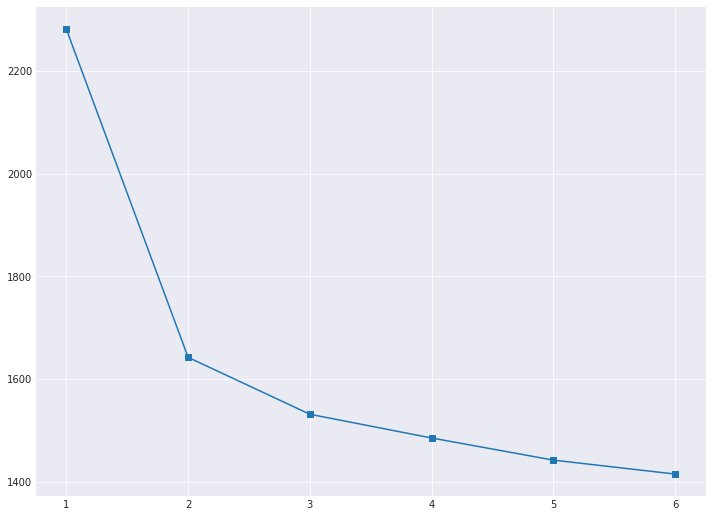

In [28]:
plt.plot(range(1,7), inertia, marker = 's')

In [29]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)
                            
ARIag = adjusted_rand_score(y, ag.labels_)
ARIkemans = adjusted_rand_score(y, cluster_labels)

In [31]:
print('KMeans: ARI =', metrics.adjusted_rand_score(y, cluster_labels))
print('Agglomerative CLustering: ARI =', metrics.adjusted_rand_score(y, ag.labels_))

KMeans: ARI = 0.4198070012602345
Agglomerative CLustering: ARI = 0.49362763373004886


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(svc, svc_params, cv = 3)
grid.fit(X_train, y_train)
best_svc =  grid.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

In [36]:
print(best_svc,'\n',grid.best_score_)

LinearSVC(C=1, random_state=17) 
 0.9464116548292103


In [37]:
y_predicted = best_svc.predict(X_test_scaled)
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index

print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         1.0       0.98      0.89      0.93       496
         2.0       0.89      0.99      0.94       471
         3.0       0.98      0.89      0.94       420
         4.0       0.84      0.70      0.77       491
         5.0       0.74      0.98      0.84       532
         6.0       1.00      0.90      0.95       537

    accuracy                           0.89      2947
   macro avg       0.91      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



In [38]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(svc, svc_params, cv = 3)
grid.fit(X_train_pca, y_train)
best_svc =  grid.best_score_

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

In [39]:
print(best_svc,'\n', grid.best_score_)

0.8998943094169531 
 0.8998943094169531
